In [1]:
import tensorflow

In [2]:
from tensorflow.keras import Sequential

In [3]:
import livelossplot

In [4]:
from livelossplot import PlotLossesKerasTF

In [5]:
import pandas as pd
df=pd.read_csv("mnist_train.csv")

In [6]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.max().max()

255

In [8]:
df.shape

(60000, 785)

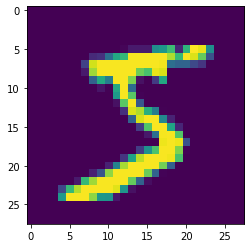

In [30]:
img1=df.iloc[0,1:]
img1.shape
img1_reshaped=img1.values.reshape(28,28)
from matplotlib import pyplot as plt
plt.imshow(img1_reshaped)
plt.show()
# it is a handwritten 5

In [10]:
from sklearn.model_selection import train_test_split
x=df.drop(columns="label")
y=df.label
#one hot encoding
y=pd.get_dummies(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=0)

In [11]:
# scaling data between 0 and 1
## min max scalar
x_train=x_train.values/255
x_test=x_test.values/255

In [12]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import livelossplot
from livelossplot import PlotLossesKerasTF

In [13]:
# build NN
model=Sequential()
model.add(Dense(128,activation="relu",name="HiddenLayer1"))
model.add(Dense(64,activation="relu",name="HiddenLayer2"))
model.add(Dense(32,activation="relu",name="HiddenLayer3"))
model.add(Dense(10,activation="softmax",name="OutputLayer"))

In [14]:
# compile 
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

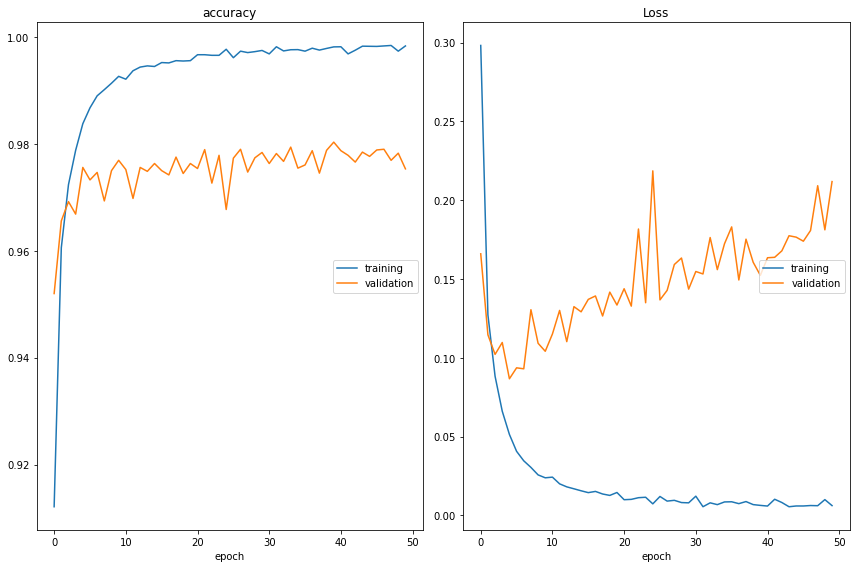

accuracy
	training         	 (min:    0.912, max:    0.998, cur:    0.998)
	validation       	 (min:    0.952, max:    0.980, cur:    0.975)
Loss
	training         	 (min:    0.006, max:    0.298, cur:    0.006)
	validation       	 (min:    0.087, max:    0.219, cur:    0.212)
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.2118 - val_accuracy: 0.9753


In [15]:
# train model
model.fit(x_train,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               100480    
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 HiddenLayer3 (Dense)        (None, 32)                2080      
                                                                 
 OutputLayer (Dense)         (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


# L2 Regularisation

In [17]:
from tensorflow.keras.regularizers import l2
# L2 Regularization
# build NN
model=Sequential()
model.add(Dense(128,activation="relu",kernel_regularizer=l2(0.001),name="HiddenLayer1"))
model.add(Dense(64,activation="relu",kernel_regularizer=l2(0.001),name="HiddenLayer2"))
model.add(Dense(32,activation="relu",kernel_regularizer=l2(0.001),name="HiddenLayer3"))
model.add(Dense(10,activation="softmax",name="OutputLayer"))

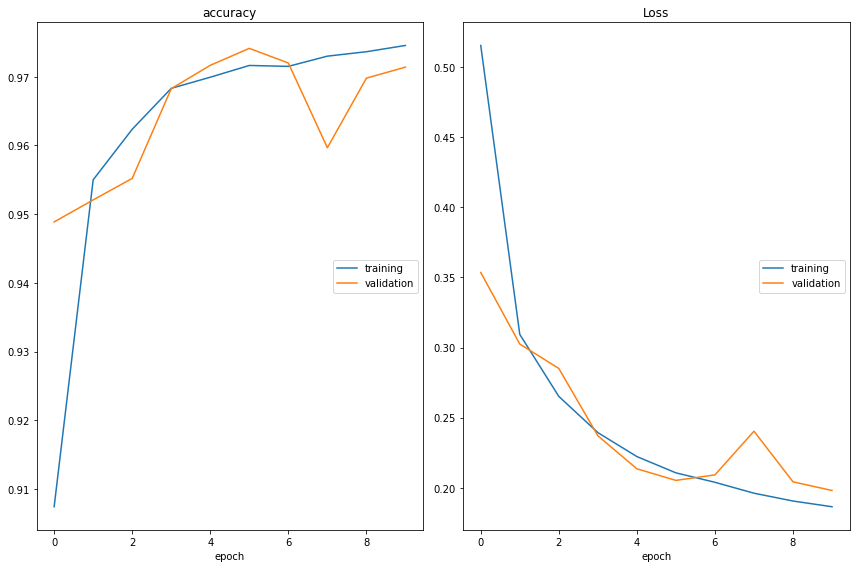

accuracy
	training         	 (min:    0.907, max:    0.975, cur:    0.975)
	validation       	 (min:    0.949, max:    0.974, cur:    0.971)
Loss
	training         	 (min:    0.186, max:    0.515, cur:    0.186)
	validation       	 (min:    0.198, max:    0.353, cur:    0.198)
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1864 - accuracy: 0.9746 - val_loss: 0.1980 - val_accuracy: 0.9714


In [18]:
# compile 
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

# train model
model.fit(x_train,y_train,epochs=10,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))

# Dropout

In [19]:
from tensorflow.keras.layers import Dropout

# build NN
model=Sequential()
model.add(Dense(128,activation="relu",name="HiddenLayer1"))
model.add(Dropout(0.20))
model.add(Dense(64,activation="relu",name="HiddenLayer2"))
model.add(Dropout(0.20))
model.add(Dense(32,activation="relu",name="HiddenLayer3"))
model.add(Dense(10,activation="softmax",name="OutputLayer"))

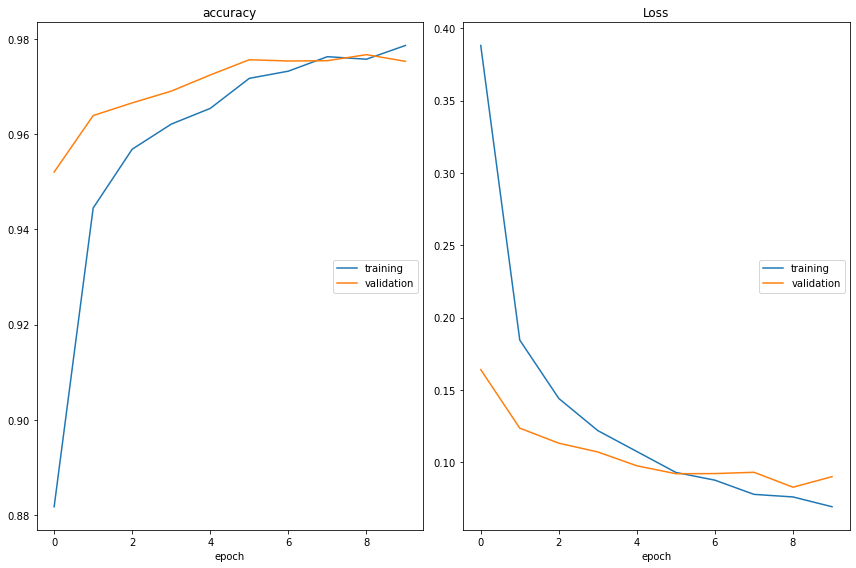

accuracy
	training         	 (min:    0.882, max:    0.979, cur:    0.979)
	validation       	 (min:    0.952, max:    0.977, cur:    0.975)
Loss
	training         	 (min:    0.069, max:    0.388, cur:    0.069)
	validation       	 (min:    0.083, max:    0.164, cur:    0.090)
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0692 - accuracy: 0.9787 - val_loss: 0.0900 - val_accuracy: 0.9753


In [20]:
# compile 
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

# train model
model.fit(x_train,y_train,epochs=10,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))

In [21]:
model.predict(x_train)

array([[9.6714741e-01, 5.6533922e-06, 1.4895018e-03, ..., 3.8142629e-05,
        1.0533435e-02, 1.8034399e-02],
       [3.0506274e-18, 2.6980335e-15, 9.4339690e-21, ..., 6.1358800e-19,
        7.1925091e-14, 1.0364567e-09],
       [9.9999917e-01, 1.6587799e-10, 7.6510752e-08, ..., 1.2495123e-10,
        3.3729178e-10, 3.0056256e-08],
       ...,
       [4.9916055e-10, 8.2961522e-09, 1.5614411e-08, ..., 3.0305071e-07,
        2.2156529e-07, 1.9563236e-03],
       [2.1015373e-08, 2.0990011e-12, 2.3702640e-09, ..., 8.7482385e-07,
        3.8279449e-08, 9.9999738e-01],
       [7.0633052e-17, 1.5184005e-12, 2.2203060e-16, ..., 4.0248456e-15,
        3.1464180e-12, 1.5126195e-08]], dtype=float32)

In [22]:
#it predicts how much probibility the image(rows) has of being the above classes(columns)
pd.DataFrame(model.predict(x_train))

,0,1,2,3,4,5,6,7,8,9
0,9.671474e-01,5.653392e-06,1.489502e-03,4.015253e-04,5.513565e-04,1.088687e-03,7.099090e-04,3.814263e-05,1.053344e-02,1.803440e-02
1,3.050627e-18,2.698034e-15,9.433969e-21,9.462878e-13,1.660687e-18,1.000000e+00,4.496664e-19,6.135880e-19,7.192509e-14,1.036457e-09
2,9.999992e-01,1.658780e-10,7.651075e-08,1.852050e-09,8.488419e-09,1.820054e-08,7.506658e-07,1.249512e-10,3.372918e-10,3.005626e-08
3,4.784311e-08,1.073190e-10,8.464823e-09,9.136037e-12,6.290325e-07,9.578054e-07,9.999983e-01,7.844483e-12,7.455149e-09,9.107851e-12
4,2.039978e-09,2.463199e-10,8.723809e-10,7.577184e-09,1.231112e-04,1.440981e-10,1.145382e-14,3.100063e-06,1.031820e-08,9.998738e-01
...,...,...,...,...,...,...,...,...,...,...
44995,6.448899e-12,2.042365e-06,9.999973e-01,4.186233e-07,8.413192e-13,1.213462e-07,8.207779e-08,3.392367e-08,5.901167e-10,3.933731e-14
44996,1.786535e-05,2.673639e-08,2.592181e-06,2.826507e-06,4.863428e-03,7.292725e-07,4.338543e-09,2.407787e-04,6.018702e-06,9.948657e-01
44997,4.991605e-10,8.296152e-09,1.561441e-08,9.980025e-01,5.760302e-10,4.055638e-05,6.280409e-17,3.030507e-07,2.215653e-07,1.956324e-03
44998,2.101537e-08,2.099001e-12,2.370264e-09,2.213447e-08,1.682396e-06,2.407733e-09,1.079088e-14,8.748239e-07,3.827945e-08,9.999974e-01


In [23]:
# highest probability means that is the class of that particular image
model.predict(x_train).argmax(axis=1)

array([0, 5, 0, ..., 3, 9, 5], dtype=int64)

In [24]:
model.predict(x_test).argmax(axis=1)

array([4, 3, 8, ..., 8, 7, 2], dtype=int64)

In [25]:
for layers in model.layers:
    print(layers.get_weights())

[array([[ 0.05476829,  0.06789946, -0.05272237, ..., -0.03072243,
        -0.00563551, -0.04432626],
       [ 0.04887571, -0.00113611, -0.01313007, ...,  0.06679711,
        -0.01381899,  0.058864  ],
       [-0.02006053,  0.05260234, -0.0365941 , ..., -0.00488975,
        -0.00397321, -0.04345217],
       ...,
       [ 0.00328585,  0.0237186 , -0.01664198, ...,  0.01303127,
        -0.03585928, -0.04672988],
       [ 0.07690532, -0.07279905, -0.06902581, ...,  0.00411453,
        -0.07936489,  0.07438921],
       [ 0.06831376, -0.06884868, -0.04213108, ..., -0.0725349 ,
        -0.06827356, -0.01032141]], dtype=float32), array([-2.53804903e-02, -7.99798816e-02, -2.42544692e-02,  1.14649907e-01,
       -2.26535145e-02,  1.89084392e-02, -1.13279849e-01,  4.69883829e-02,
       -9.94635224e-02,  2.63729721e-01,  1.32417642e-02,  9.56214964e-02,
        1.26899078e-01,  1.12375647e-01, -6.45362735e-02, -9.17328373e-02,
        4.52378392e-02, -7.78922737e-02,  1.24532938e-01,  2.86652297e